In [17]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows',500)

from datetime import datetime
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams['figure.figsize']=(16,9)

import seaborn as sns
sns.set(style='darkgrid')

![CRISP_DM](../reports/figures/CRISP_DM.png)

## Explorative Data Analysis

- Focus is often a visual representation of the data 

In [18]:
data_path="../data/processed/COVID_small_flat_table.csv"
df_plot=pd.read_csv(data_path, sep = ';')
df_plot.head()

,date,Italy,US,Spain,Germany,"Korea, South",India
0,2020-01-22,0,1,0,0,1,0
1,2020-01-23,0,1,0,0,1,0
2,2020-01-24,0,2,0,0,2,0
3,2020-01-25,0,2,0,0,2,0
4,2020-01-26,0,5,0,0,3,0


# Matplotlib

<Figure size 1152x648 with 0 Axes>

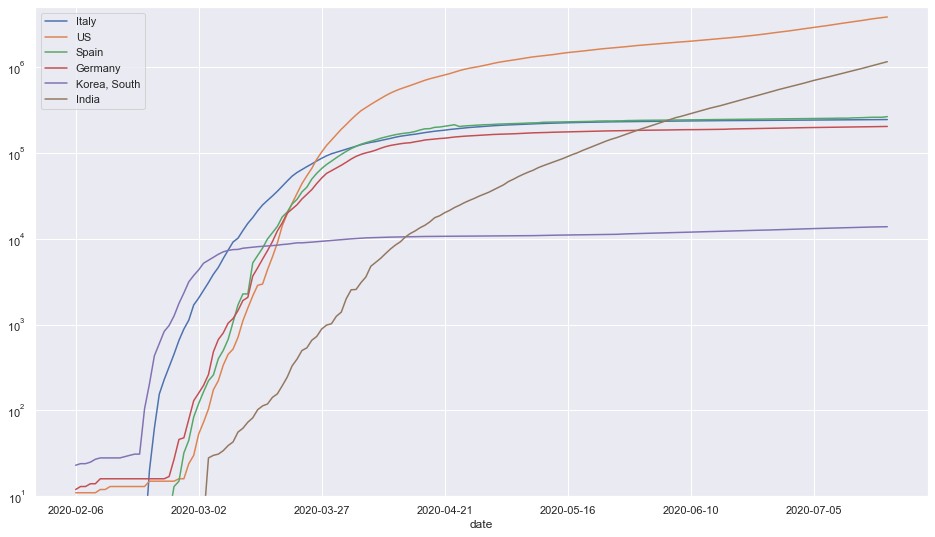

In [19]:
plt.figure();
ax=df_plot.iloc[15:,:].set_index('date').plot()
plt.ylim(10,5000000)
ax.set_yscale('log')

# Plot.ly

In [20]:
import plotly.graph_objects as go


In [21]:
import plotly
import plotly.express as px
plotly.__version__

'4.9.0'

In [40]:
country_list=['Italy',
              'US',
              'Spain',
              'Germany',
              'Korea, South',
              'India',
             ] 

In [47]:
import dash
import dash_core_components as dcc
import dash_html_components as html
fig=go.Figure()
app=dash.Dash()
app.layout= html.Div([
                        html.Label('Multi Select Country'),
                        dcc.Dropdown(
                        id='country drop down',
                        options=[
                                {'label':each, 'value':each} for each in country_list
                                ],
                        value=country_list,
                        multi=True),
                dcc.Graph(figure=fig, id='main_window_slope') 
                        
                            
])

In [48]:
from dash.dependencies import Input, Output

@app.callback(
Output('main_window_slope','figure'),
[Input('country drop down','value')])
def update_figure(country_list):
    traces=[]
    for each in country_list:
        traces.append(dict(x=df_plot['date'],
                             y=df_plot[each], 
                             mode='markers+lines',
                             name = each,
                             line_width=1.5,
                             opacity=0.9,
                             marker_size=3
                            )
                 )
    return{
        'data':traces,
        'layout':dict(xaxis_title='Time', 
                  yaxis_title='Confirmed Infected people (Source John Hopkin csse)',
                  xaxis={'tickangle':-45,
                        'nticks':20,
                        'tickfont':dict(size=14,color="#7f7f7f"),
                        },
                  yaxis={'type':"log",
                       'range':'[1.1,5.5]'
                        },
                  width=1500, 
                  height=750,
                  updatemenus=[
                dict(
                    
                    direction='right',
                    xanchor='left',
                    yanchor='top',
                    y=1.1,
                    x=0.025,
                    buttons=[
                     dict(label="Linear",  
                          method="relayout", 
                          args=[{"yaxis.type": "linear"}]),
                     dict(label="Log", 
                          method="relayout", 
                          args=[{"yaxis.type": "log","yaxis.title":"hi"+" loglog"}]),
                                  ])],
                  title={
                        'text': "COVID-19",
                        'y':0.9,
                        'x':0.5,
                        'xanchor': 'center',
                        'yanchor': 'top'},
                  xaxis_rangeslider_visible=True,
                  template="plotly_dark",
                  
                  )
        
    }

In [49]:
app.run_server(debug=True, use_reloader=False) #Turn off reloader if inside Jupyter

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

 in production, use a production WSGI server like gunicorn instead.

 in production, use a production WSGI server like gunicorn instead.

 in production, use a production WSGI server like gunicorn instead.

 in production, use a production WSGI server like gunicorn instead.

 in production, use a production WSGI server like gunicorn instead.

 in production, use a production WSGI server like gunicorn instead.

 in production, use a production WSGI server like gunicorn instead.

 in production, use a production WSGI server like gunicorn instead.

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI serve

In [12]:
fig=go.Figure()
## Defines how to plot individual trace
for each in country_list:
    fig.add_trace(go.Scatter(x=df_plot['date'],
                             y=df_plot[each], 
                             mode='markers+lines',
                             name = each,
                             line_width=1.5,
                             opacity=0.9,
                             marker_size=3
                            )
                 )

##Defines overall layout
fig.update_layout(xaxis_title='Time', 
                  yaxis_title='Confirmed Infected people (Source John Hopkin csse)', 
                  width=1600, 
                  height=900,
                  updatemenus=[
                dict(
                    
                    direction='right',
                    xanchor='left',
                    yanchor='top',
                    y=1.1,
                    x=0.025,
                    buttons=[
                     dict(label="Linear",  
                          method="relayout", 
                          args=[{"yaxis.type": "linear"}]),
                     dict(label="Log", 
                          method="relayout", 
                          args=[{"yaxis.type": "log"}]),
                                  ])],
                  title={
                        'text': "COVID-19",
                        'y':0.9,
                        'x':0.5,
                        'xanchor': 'center',
                        'yanchor': 'top'},
                  xaxis_rangeslider_visible=True,
                  template="plotly_dark",
                  
                  )

#fig.update_yaxes(id ='log', range=[0,7])
#fig.update_layout(xaxis_rangeslider_visible=True)
#fig.show(renderer='browser')